In [14]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
# Load Dataset

dataset = glob.glob(os.path.join("dataset", "*"))

(64, 64, 3)

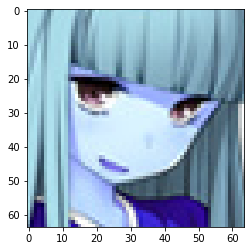

In [16]:
# Try to load sample data
SAMPLE_INDEX = 250


sample = cv2.imread(dataset[SAMPLE_INDEX], cv2.COLOR_BGR2RGB)
plt.imshow(sample)
sample.shape

In [17]:
resized_img = []

# Load with PIL and convert each data into RGB format
# Read, Resize, Convert range to -1 to 1
for idx, path in enumerate(dataset):
    img = Image.open(path)
    img = img.convert('RGB')
    img = np.array(img)
    img = cv2.resize(img, (64, 64))
    img = (img - 127.5) / 127.5
    
    resized_img.append(img)
    
resized_img = np.array(resized_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


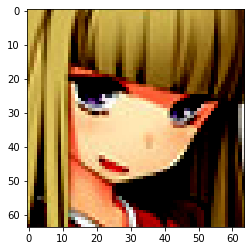

In [18]:
# After preprocess sample
sample = resized_img[SAMPLE_INDEX]
print(sample.shape)
plt.imshow(sample)

In [19]:
# Save preprocessed data into npz
np.savez("utils//preprocessed.npz", x=resized_img)

In [20]:
# Generate random noise that will be used later for character generation
generated_noise = np.random.uniform(-1,1,size=[10,100])
np.savez("utils//noise.npz", noise=generated_noise)